<a href="https://colab.research.google.com/github/fadiismail27/Fama_Frech_Stock_Predictor/blob/main/Fama_French_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

# Imports

*   yfinance: To download historical data for stocks and market indices.
*   pandas: For data manipulation and analysis.
*   numpy: For numerical operations.
*   matplotlib: For visualizing data.
*   statsmodels: For regression analysis.

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data Collection

In [ ]:
  # Download historical data for the S&P 500 (market data)
  #Using data for the S&P 500 to reprensent the market return
sp500_data = yf.download("^GSPC", start="2010-01-01", end="2024-01-01")

# Display the first few rows to see what we have
sp500_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2010-01-04 00:00:00+00:00,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05 00:00:00+00:00,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06 00:00:00+00:00,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07 00:00:00+00:00,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08 00:00:00+00:00,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [ ]:
stock_tickers = ["AAPL", "MSFT", "GOOGL"]
# Download historical data for multiple stocks
multi_stock_data = yf.download(stock_tickers, start="2010-01-01", end="2023-01-01", group_by='ticker')

# Display the first few rows of the dataset to see the structure
multi_stock_data.head()

[*********************100%***********************]  3 of 3 completed


Ticker                          MSFT                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2010-01-04 00:00:00+00:00  30.620001  31.100000  30.590000  30.950001   
2010-01-05 00:00:00+00:00  30.850000  31.100000  30.639999  30.959999   
2010-01-06 00:00:00+00:00  30.879999  31.080000  30.520000  30.770000   
2010-01-07 00:00:00+00:00  30.629999  30.700001  30.190001  30.450001   
2010-01-08 00:00:00+00:00  30.280001  30.879999  30.240000  30.660000   

Ticker                                              GOOGL             \
Price                      Adj Close    Volume       Open       High   
Date                                                                   
2010-01-04 00:00:00+00:00  23.347317  38409100  15.689439  15.753504   
2010-01-05 00:00:00+00:00  23.354860  49749600  15.695195  15.711712   
2010-01-06 00:00:00+00:00  23.211535  58182400  15.662162  15.662162   
2010-01-07 00:00:00+00:00  22.970142  50559700  15.250250  15.265265   
2010-01-08 00:00:00+00:00  23.128561  51197400  14.814815  15.096346   

Ticker                                                                 \
Price                            Low      Close  Adj Close     Volume   
Date                                                                    
2010-01-04 00:00:00+00:00  15.621622  15.684434  15.645692   78169752   
2010-01-05 00:00:00+00:00  15.554054  15.615365  15.576794  120067812   
2010-01-06 00:00:00+00:00  15.174174  15.221722  15.184124  158988852   
2010-01-07 00:00:00+00:00  14.831081  14.867367  14.830644  256315428   
2010-01-08 00:00:00+00:00  14.742492  15.065566  15.028353  188783028   

Ticker                         AAPL                                          \
Price                          Open      High       Low     Close Adj Close   
Date                                                                          
2010-01-04 00:00:00+00:00  7.622500  7.660714  7.585000  7.643214  6.454504   
2010-01-05 00:00:00+00:00  7.664286  7.699643  7.616071  7.656429  6.465664   
2010-01-06 00:00:00+00:00  7.656429  7.686786  7.526786  7.534643  6.362821   
2010-01-07 00:00:00+00:00  7.562500  7.571429  7.466071  7.520714  6.351056   
2010-01-08 00:00:00+00:00  7.510714  7.571429  7.466429  7.570714  6.393281   

Ticker                                
Price                         Volume  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800

In [ ]:
# Calculate daily returns for each stock (using the Adjusted Close price)
for ticker in stock_tickers:
    multi_stock_data[ticker, 'Daily Return'] = multi_stock_data[ticker]['Adj Close'].pct_change()

#Calculate daily returns in S&P 500
sp500_data["Market Return"] = sp500_data["Adj Close"].pct_change()

# Display the first few rows of the dataset to see the calculated returns
multi_stock_data.head()

Ticker                          MSFT                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2010-01-04 00:00:00+00:00  30.620001  31.100000  30.590000  30.950001   
2010-01-05 00:00:00+00:00  30.850000  31.100000  30.639999  30.959999   
2010-01-06 00:00:00+00:00  30.879999  31.080000  30.520000  30.770000   
2010-01-07 00:00:00+00:00  30.629999  30.700001  30.190001  30.450001   
2010-01-08 00:00:00+00:00  30.280001  30.879999  30.240000  30.660000   

Ticker                                              GOOGL             \
Price                      Adj Close    Volume       Open       High   
Date                                                                   
2010-01-04 00:00:00+00:00  23.347317  38409100  15.689439  15.753504   
2010-01-05 00:00:00+00:00  23.354860  49749600  15.695195  15.711712   
2010-01-06 00:00:00+00:00  23.211535  58182400  15.662162  15.662162   
2010-01-07 00:00:00+00:00  22.970142  50559700  15.250250  15.265265   
2010-01-08 00:00:00+00:00  23.128561  51197400  14.814815  15.096346   

Ticker                                           ...                 AAPL  \
Price                            Low      Close  ...     Volume      Open   
Date                                             ...                        
2010-01-04 00:00:00+00:00  15.621622  15.684434  ...   78169752  7.622500   
2010-01-05 00:00:00+00:00  15.554054  15.615365  ...  120067812  7.664286   
2010-01-06 00:00:00+00:00  15.174174  15.221722  ...  158988852  7.656429   
2010-01-07 00:00:00+00:00  14.831081  14.867367  ...  256315428  7.562500   
2010-01-08 00:00:00+00:00  14.742492  15.065566  ...  188783028  7.510714   

Ticker                                                                        \
Price                          High       Low     Close Adj Close     Volume   
Date                                                                           
2010-01-04 00:00:00+00:00  7.660714  7.585000  7.643214  6.454504  493729600   
2010-01-05 00:00:00+00:00  7.699643  7.616071  7.656429  6.465664  601904800   
2010-01-06 00:00:00+00:00  7.686786  7.526786  7.534643  6.362821  552160000   
2010-01-07 00:00:00+00:00  7.571429  7.466071  7.520714  6.351056  477131200   
2010-01-08 00:00:00+00:00  7.571429  7.466429  7.570714  6.393281  447610800   

Ticker                                         MSFT        GOOGL  
Price                     Daily Return Daily Return Daily Return  
Date                                                              
2010-01-04 00:00:00+00:00          NaN          NaN          NaN  
2010-01-05 00:00:00+00:00     0.001729     0.000323    -0.004404  
2010-01-06 00:00:00+00:00    -0.015906    -0.006137    -0.025209  
2010-01-07 00:00:00+00:00    -0.001849    -0.010400    -0.023280  
2010-01-08 00:00:00+00:00     0.006649     0.006897     0.013331  

[5 rows x 21 columns]

In [ ]:
# Remove rows with NaN values in Daily Return, this is because the first days in dataset don't have a previous day to calcualte return
multi_stock_data = multi_stock_data.dropna(subset=[(ticker, 'Daily Return') for ticker in stock_tickers])
multi_stock_data.head()

Ticker                          MSFT                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2010-01-05 00:00:00+00:00  30.850000  31.100000  30.639999  30.959999   
2010-01-06 00:00:00+00:00  30.879999  31.080000  30.520000  30.770000   
2010-01-07 00:00:00+00:00  30.629999  30.700001  30.190001  30.450001   
2010-01-08 00:00:00+00:00  30.280001  30.879999  30.240000  30.660000   
2010-01-11 00:00:00+00:00  30.709999  30.760000  30.120001  30.270000   

Ticker                                              GOOGL             \
Price                      Adj Close    Volume       Open       High   
Date                                                                   
2010-01-05 00:00:00+00:00  23.354860  49749600  15.695195  15.711712   
2010-01-06 00:00:00+00:00  23.211535  58182400  15.662162  15.662162   
2010-01-07 00:00:00+00:00  22.970142  50559700  15.250250  15.265265   
2010-01-08 00:00:00+00:00  23.128561  51197400  14.814815  15.096346   
2010-01-11 00:00:00+00:00  22.834360  68754700  15.126627  15.126627   

Ticker                                           ...                 AAPL  \
Price                            Low      Close  ...     Volume      Open   
Date                                             ...                        
2010-01-05 00:00:00+00:00  15.554054  15.615365  ...  120067812  7.664286   
2010-01-06 00:00:00+00:00  15.174174  15.221722  ...  158988852  7.656429   
2010-01-07 00:00:00+00:00  14.831081  14.867367  ...  256315428  7.562500   
2010-01-08 00:00:00+00:00  14.742492  15.065566  ...  188783028  7.510714   
2010-01-11 00:00:00+00:00  14.865866  15.042793  ...  288227484  7.600000   

Ticker                                                                        \
Price                          High       Low     Close Adj Close     Volume   
Date                                                                           
2010-01-05 00:00:00+00:00  7.699643  7.616071  7.656429  6.465664  601904800   
2010-01-06 00:00:00+00:00  7.686786  7.526786  7.534643  6.362821  552160000   
2010-01-07 00:00:00+00:00  7.571429  7.466071  7.520714  6.351056  477131200   
2010-01-08 00:00:00+00:00  7.571429  7.466429  7.570714  6.393281  447610800   
2010-01-11 00:00:00+00:00  7.607143  7.444643  7.503929  6.336882  462229600   

Ticker                                         MSFT        GOOGL  
Price                     Daily Return Daily Return Daily Return  
Date                                                              
2010-01-05 00:00:00+00:00     0.001729     0.000323    -0.004404  
2010-01-06 00:00:00+00:00    -0.015906    -0.006137    -0.025209  
2010-01-07 00:00:00+00:00    -0.001849    -0.010400    -0.023280  
2010-01-08 00:00:00+00:00     0.006649     0.006897     0.013331  
2010-01-11 00:00:00+00:00    -0.008822    -0.012720    -0.001512  

[5 rows x 21 columns]

# Introducing the Risk-Free Rate and Calculating Excess Returns

Excess Market Return=R
m
​
 −R
f
​

Where:

𝑅
𝑚
R
m
​
  = Market Return

𝑅
𝑓
R
f
​
  = Risk-Free Rate

Purpose: By subtracting the risk-free rate, we focus only on the return that comes from taking on additional risk, beyond what could be earned on a risk-free asset. It represents the return that investors get from the market that is in excess of a risk-free return.

Role in the Fama-French Model: The excess market return is used as a key explanatory variable in the Fama-French regression. It helps us understand how much of a stock's return is due to general market movements compared to the risk-free alternative.

In [ ]:
# Assume an annual risk-free rate of 1%
annual_risk_free_rate = 0.01

# Convert to a daily risk-free rate (assuming 252 trading days in a year)
daily_risk_free_rate = annual_risk_free_rate / 252

print(f"Daily Risk-Free Rate: {daily_risk_free_rate:.6f}")

Daily Risk-Free Rate: 0.000040


In [ ]:
# Calculate excess returns for the S&P 500 (Market Excess Return)
sp500_data['Excess Market Return'] = sp500_data['Market Return'] - daily_risk_free_rate

# Calculate excess returns for each stock by subtracting the daily risk-free rate
for ticker in stock_tickers:
    multi_stock_data[(ticker, 'Excess Return')] = multi_stock_data[(ticker, 'Daily Return')] - daily_risk_free_rate

# Display the first few rows to see the excess returns
sp500_data[['Market Return', 'Excess Market Return']].head()

<ipython-input-7-f1a35526cb2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_stock_data[(ticker, 'Excess Return')] = multi_stock_data[(ticker, 'Daily Return')] - daily_risk_free_rate
<ipython-input-7-f1a35526cb2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_stock_data[(ticker, 'Excess Return')] = multi_stock_data[(ticker, 'Daily Return')] - daily_risk_free_rate
<ipython-input-7-f1a35526cb2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Price,Market Return,Excess Market Return
Ticker,,
Date,,
2010-01-04 00:00:00+00:00,NaN,NaN
2010-01-05 00:00:00+00:00,0.003116,0.003076
2010-01-06 00:00:00+00:00,0.000546,0.000506
2010-01-07 00:00:00+00:00,0.004001,0.003962
2010-01-08 00:00:00+00:00,0.002882,0.002842


# New Section

In [ ]:
# Load the Fama-French SMB and HML factors from a CSV file
factors_data = pd.read_csv('fama_french_factors.csv', skiprows=4)

factors_data.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [ ]:
# Rename columns for easier reference
factors_data.rename(columns={'Unnamed: 0': 'Date','Mkt-RF': 'Excess Market Return', 'SMB': 'SMB', 'HML': 'HML', 'RF': 'Risk-Free Rate'}, inplace=True)

# Reset the index after dropping rows
factors_data.reset_index(drop=True, inplace=True)

# Remove specific rows by index
factors_data = factors_data.drop([25817])

# Reset the index after dropping rows
factors_data.reset_index(drop=True, inplace=True)

# Convert the date column from YYYYMMDD format to datetime format
factors_data['Date'] = pd.to_datetime(factors_data['Date'], format='%Y%m%d')

factors_data.head()

,Date,Excess Market Return,SMB,HML,Risk-Free Rate
0,1926-07-01,0.10,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.21,-0.38,0.19,0.009


In [ ]:
factors_data.tail()

,Date,Excess Market Return,SMB,HML,Risk-Free Rate
25812,2024-08-26,-0.34,0.10,0.16,0.022
25813,2024-08-27,0.06,-0.86,0.02,0.022
25814,2024-08-28,-0.67,-0.55,1.14,0.022
25815,2024-08-29,0.08,0.38,0.28,0.022
25816,2024-08-30,0.98,-0.55,0.04,0.022


In [ ]:
# Set the Date column as the index
factors_data.set_index('Date', inplace=True)

factors_data.head()

,Excess Market Return,SMB,HML,Risk-Free Rate
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009


In [ ]:
# Convert all numeric columns to float
factors_data[['Excess Market Return', 'SMB', 'HML', 'Risk-Free Rate']] = factors_data[['Excess Market Return', 'SMB', 'HML', 'Risk-Free Rate']].apply(pd.to_numeric)


In [ ]:
# Initialize a dictionary to store combined data for each stock
combined_data_dict = {}

# Loop through each stock ticker to merge the data
for ticker in stock_tickers:
    # Step 1: Merge S&P 500 data (Excess Market Return) with individual stock excess return
    combined_data = pd.merge(
        sp500_data[['Excess Market Return']],
        multi_stock_data[(ticker, 'Excess Return')],  # Use tuple to access the multi-level column
        left_index=True, right_index=True, how='inner'
    )

    # Step 2: Reset the index of combined_data to flatten the multi-level index
    combined_data.reset_index(inplace=True)

    # Step 3: Flatten multi-level columns in combined_data (if needed)
    combined_data.columns = combined_data.columns.map('_'.join).str.strip('_')

    # Step 4: Convert the "Date" column to datetime format (remove timezones)
    combined_data['Date'] = pd.to_datetime(combined_data['Date']).dt.tz_localize(None)
    factors_data.index = pd.to_datetime(factors_data.index).tz_localize(None)

    # Step 5: Merge with SMB and HML factors (ensure indices match)
    combined_data = pd.merge(
        combined_data,
        factors_data[['SMB', 'HML']],
        left_on='Date', right_index=True, how='inner'
    )

    # Step 6: Set Date as index again for convenience
    combined_data.set_index('Date', inplace=True)

    # Step 7: Store the combined data in a dictionary
    combined_data_dict[ticker] = combined_data

# Display combined data for one of the stocks (e.g., AAPL)
combined_data_dict['AAPL'].head()


,Excess Market Return,AAPL_Excess Return,SMB,HML
Date,,,,
2010-01-05,0.003076,0.001689,-0.64,1.24
2010-01-06,0.000506,-0.015946,-0.22,0.57
2010-01-07,0.003962,-0.001889,0.09,0.98
2010-01-08,0.002842,0.006609,0.37,0.01
2010-01-11,0.001707,-0.008861,-0.13,-0.25


In [ ]:
# Individual Analysis

# Get the combined data for Apple
combined_data = combined_data_dict['AAPL']

# Define the independent variables (Excess Market Return, SMB, HML)
X = combined_data[['Excess Market Return', 'SMB', 'HML']]
X = sm.add_constant(X)  # Add intercept (alpha)

# Define the dependent variable (Excess Return for Apple)
y = combined_data['AAPL_Excess Return']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print summary of the model for Apple
print("Regression Results for AAPL:")
print(model.summary())


Regression Results for AAPL:
                            OLS Regression Results                            
Dep. Variable:     AAPL_Excess Return   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1189.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:35:47   Log-Likelihood:                 9691.1
No. Observations:                3271   AIC:                        -1.937e+04
Df Residuals:                    3267   BIC:                        -1.935e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

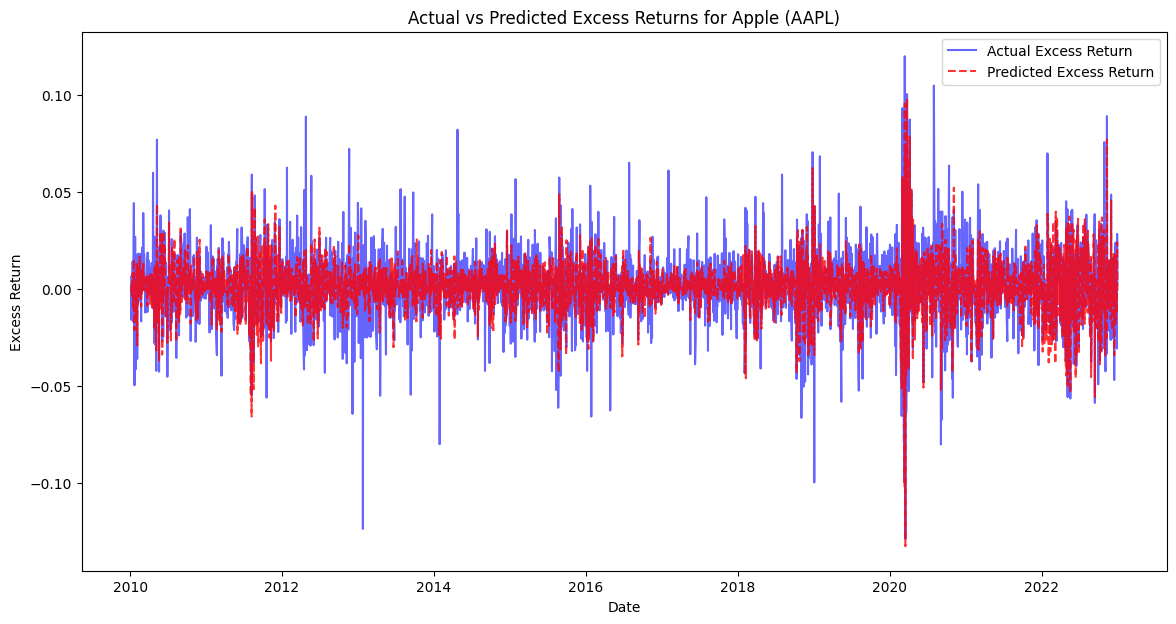

In [ ]:
# Step 1: Make Predictions with the Model
predictions = model.predict(X)

# Step 2: Plot Actual vs Predicted Excess Returns
plt.figure(figsize=(14, 7))

# Plot actual excess returns
plt.plot(combined_data.index, y, label='Actual Excess Return', color='blue', alpha=0.6)

# Plot predicted excess returns
plt.plot(combined_data.index, predictions, label='Predicted Excess Return', color='red', linestyle='--', alpha=0.8)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.title('Actual vs Predicted Excess Returns for Apple (AAPL)')
plt.legend()

# Show plot
plt.show()

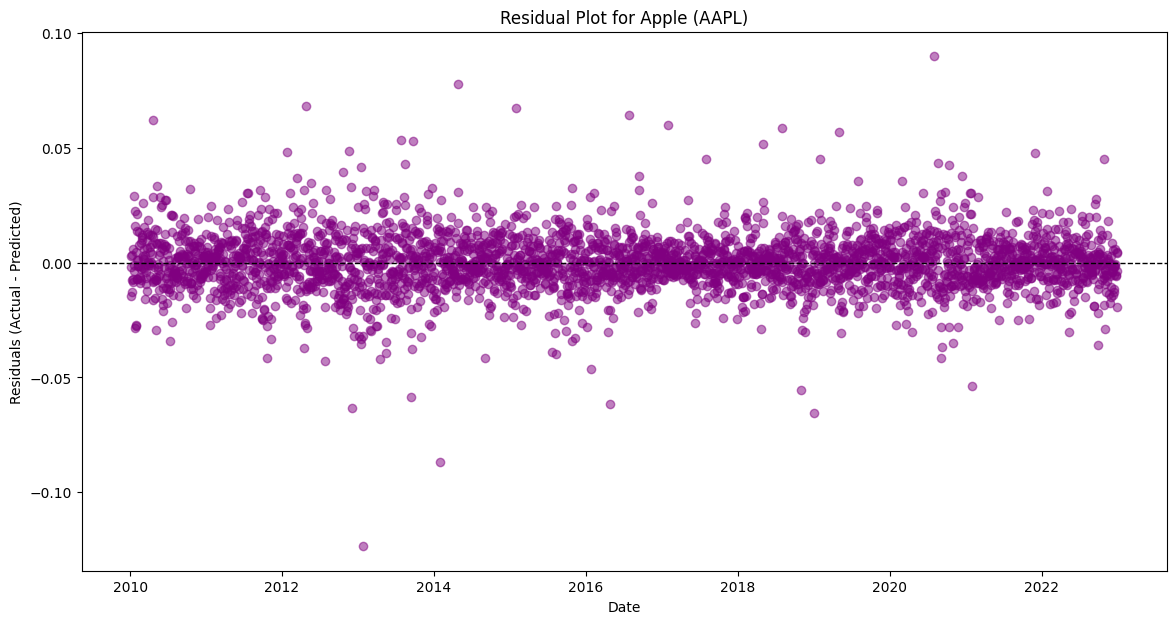

In [ ]:
# Step 1: Calculate Residuals
residuals = y - predictions

# Step 2: Plot the Residuals
plt.figure(figsize=(14, 7))
plt.scatter(combined_data.index, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Apple (AAPL)')

# Show plot
plt.show()


In [ ]:
# Loop through each stock and run the regression
for ticker in stock_tickers:
    # Get the combined data for the current stock
    combined_data = combined_data_dict[ticker]

    # Define the independent variables (Excess Market Return, SMB, HML)
    X = combined_data[['Excess Market Return', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Add intercept (alpha)

    # Define the dependent variable (Excess Return)
    y = combined_data[f'{ticker}_Excess Return']

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Print summary of the model for the current stock
    print(f"Regression Results for {ticker}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")


Regression Results for AAPL:
                            OLS Regression Results                            
Dep. Variable:     AAPL_Excess Return   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1189.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:35:51   Log-Likelihood:                 9691.1
No. Observations:                3271   AIC:                        -1.937e+04
Df Residuals:                    3267   BIC:                        -1.935e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

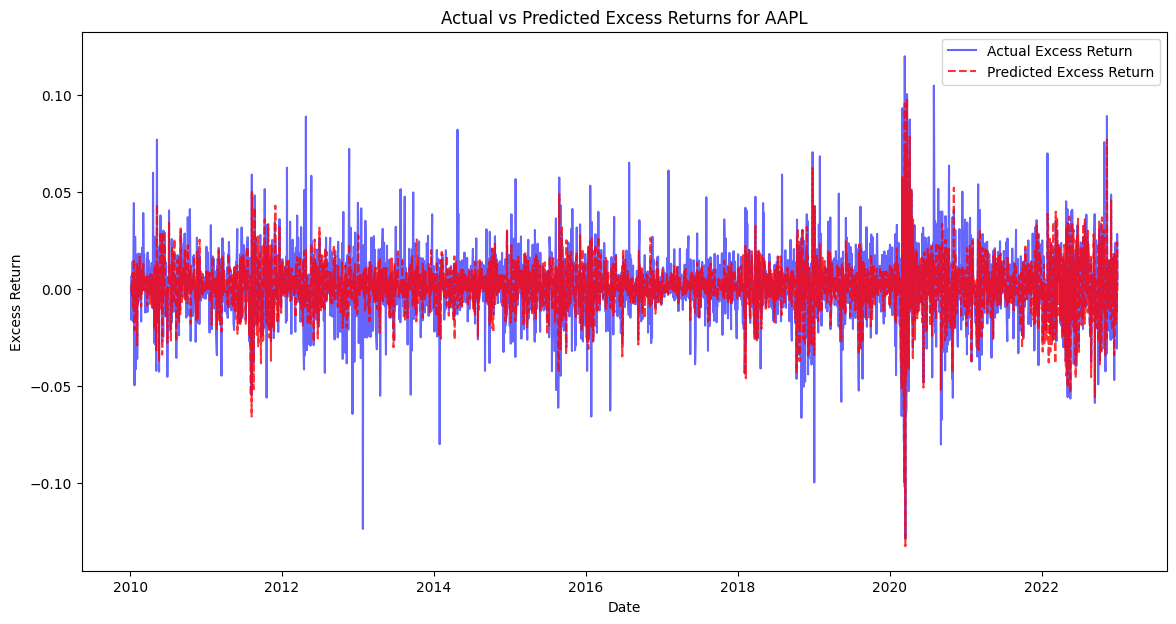

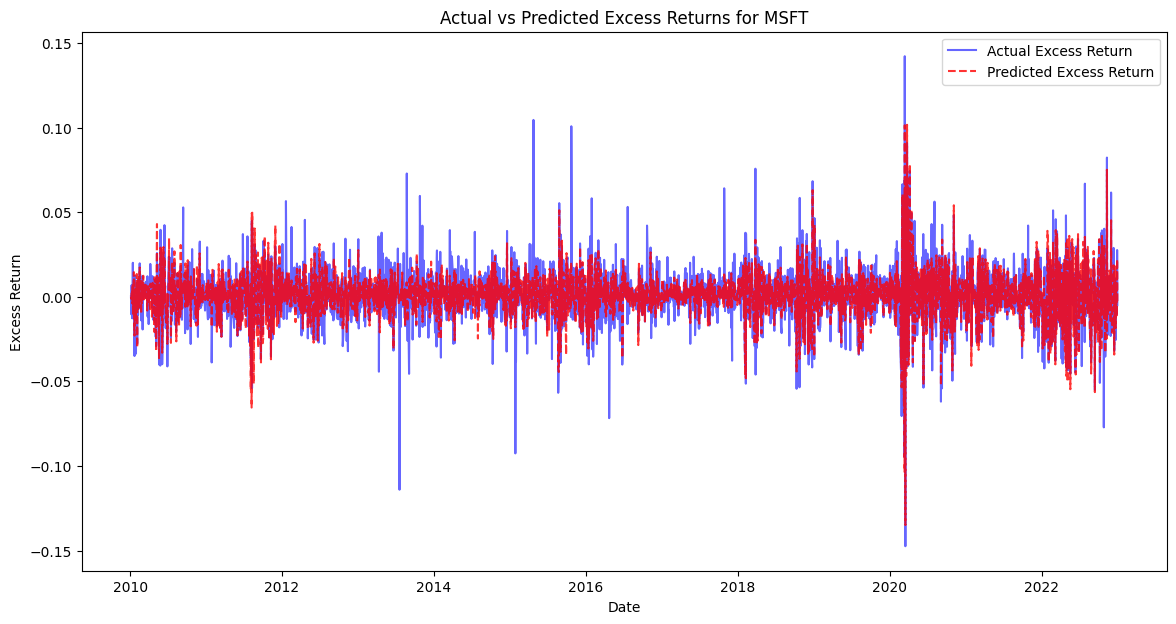

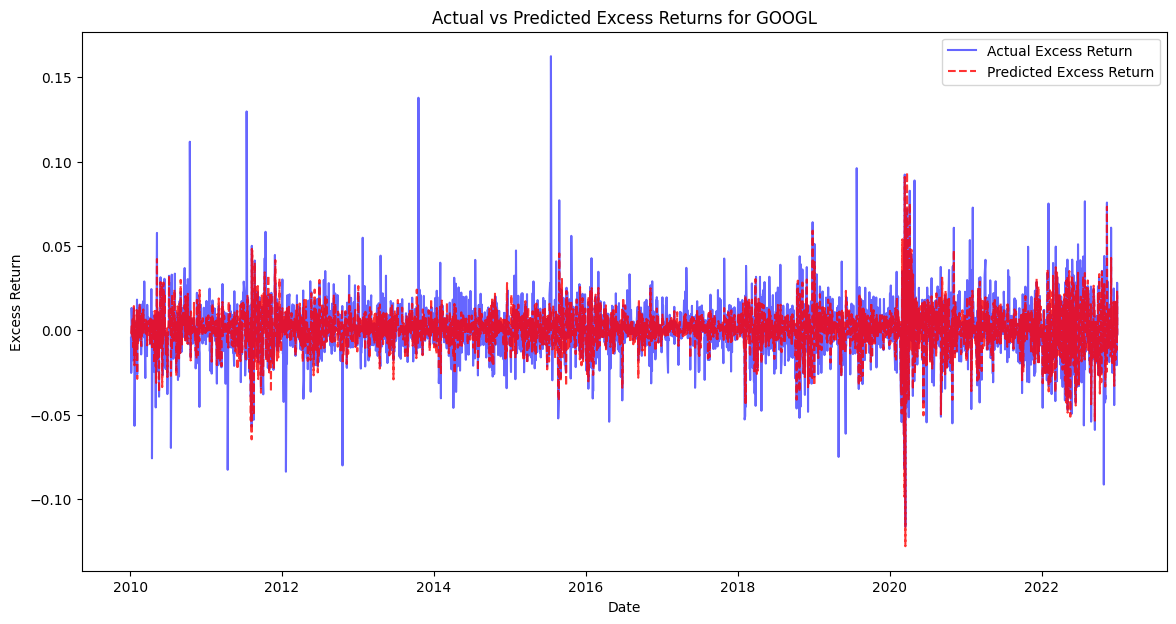

In [ ]:
for ticker in stock_tickers:
    # Get the combined data for the current stock
    combined_data = combined_data_dict[ticker]

    # Define the independent variables (Excess Market Return, SMB, HML)
    X = combined_data[['Excess Market Return', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Add intercept (alpha)

    # Define the dependent variable (Excess Return)
    y = combined_data[f'{ticker}_Excess Return']

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Make Predictions
    predictions = model.predict(X)

    # Plot Actual vs Predicted Excess Returns
    plt.figure(figsize=(14, 7))
    plt.plot(combined_data.index, y, label='Actual Excess Return', color='blue', alpha=0.6)
    plt.plot(combined_data.index, predictions, label='Predicted Excess Return', color='red', linestyle='--', alpha=0.8)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Excess Return')
    plt.title(f'Actual vs Predicted Excess Returns for {ticker}')
    plt.legend()

    # Show plot
    plt.show()

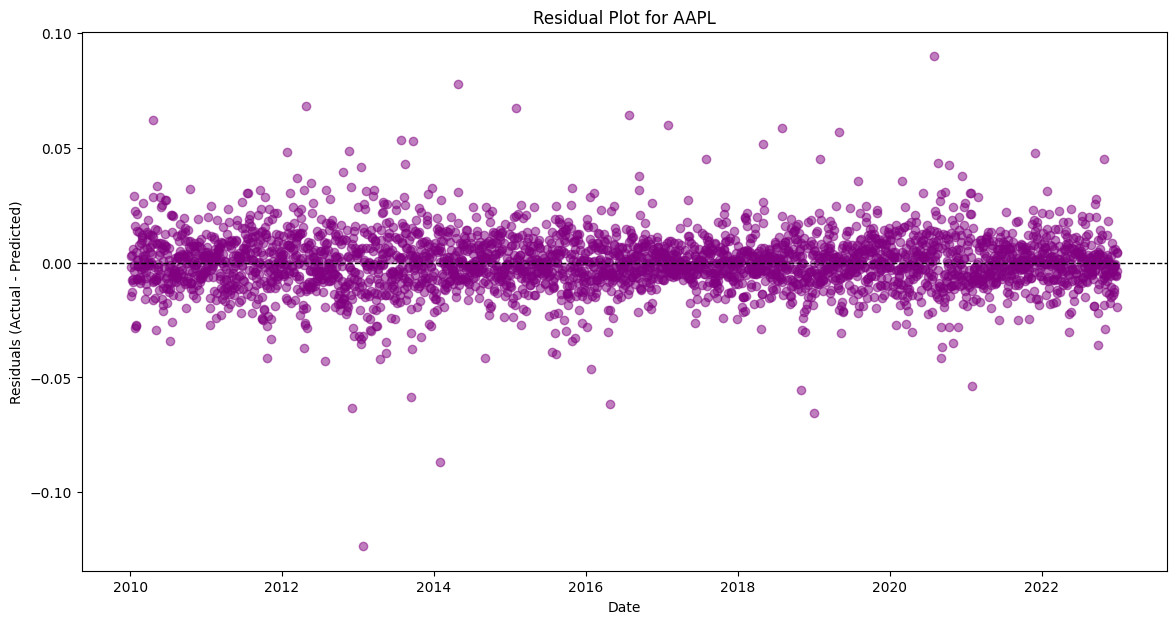

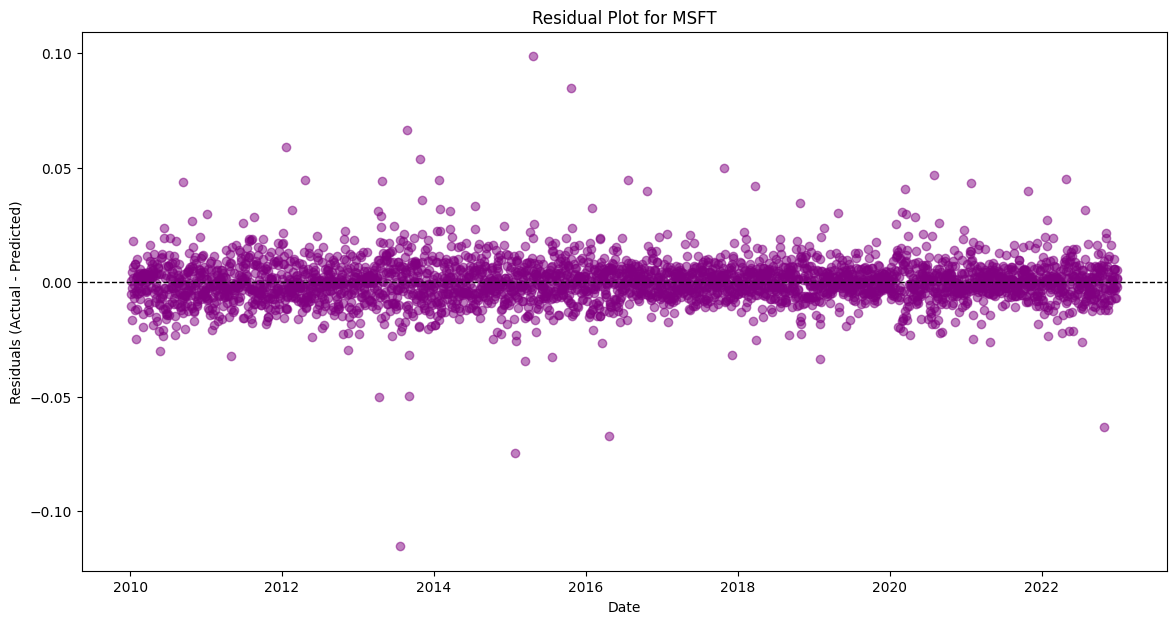

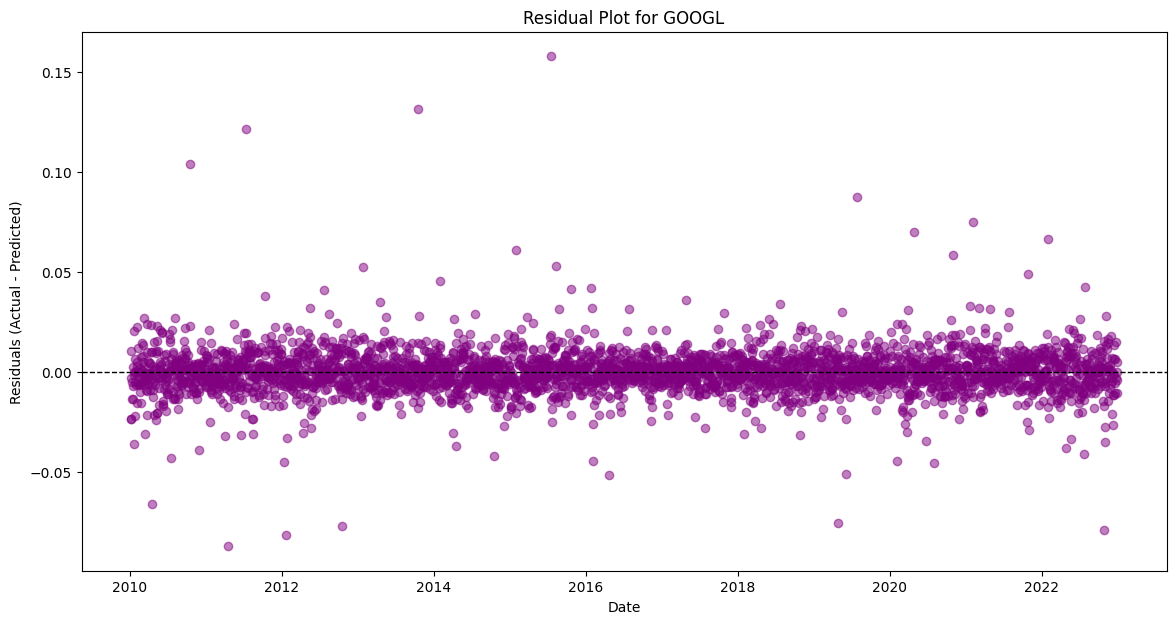

In [ ]:
for ticker in stock_tickers:
    # Get the combined data for the current stock
    combined_data = combined_data_dict[ticker]

    # Define the independent variables (Excess Market Return, SMB, HML)
    X = combined_data[['Excess Market Return', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Add intercept (alpha)

    # Define the dependent variable (Excess Return)
    y = combined_data[f'{ticker}_Excess Return']

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Make Predictions
    predictions = model.predict(X)

    # Calculate Residuals
    residuals = y - predictions

    # Plot Residuals
    plt.figure(figsize=(14, 7))
    plt.scatter(combined_data.index, residuals, color='purple', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'Residual Plot for {ticker}')

    # Show plot
    plt.show()